## Get data

In [1]:
from utils.mt5 import initialize_, get_currency_pair_data_

initialize_()

currency_pair = 'USDJPY'

df = get_currency_pair_data_(currency_pair)[['close']]
df

,close
time,
2021-03-15,109.123
2021-03-16,109.025
2021-03-17,108.894
2021-03-18,108.929
2021-03-19,108.861
...,...
2024-09-09,143.181
2024-09-10,142.229
2024-09-11,142.632


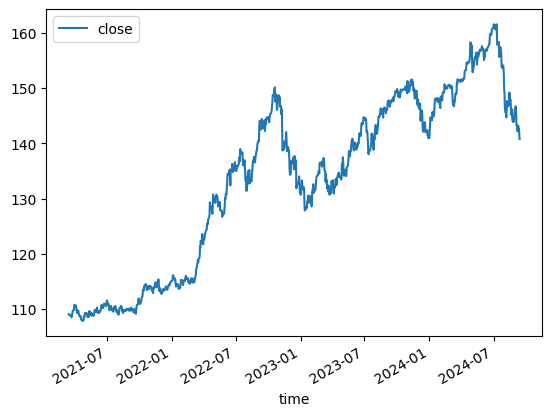

In [2]:
df.plot();

## Check for Seasonality

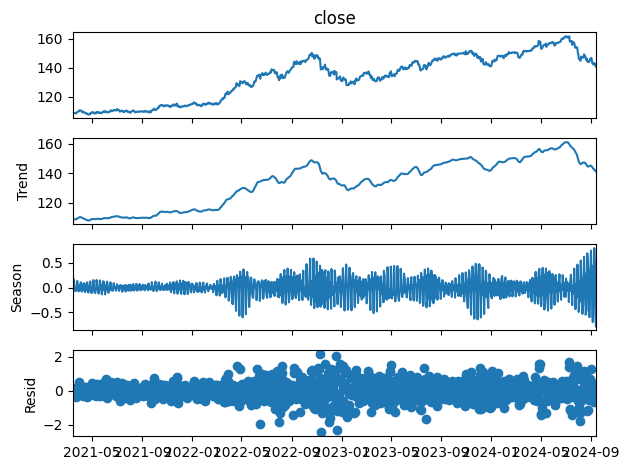

In [3]:
from statsmodels.tsa.seasonal import STL

stl = STL(df.close, period=7, seasonal=13)
res = stl.fit()

fig = res.plot()


## Train SARIMAX (data has seasonality)

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from utils.arima import get_pdq_params_sarimax

best_order, best_seasonal_order = get_pdq_params_sarimax(df, 'close', seasonal=True)

sarimax = SARIMAX(df.close, order=best_order, seasonal_order=best_seasonal_order)
model = sarimax.fit()

## Test the model

In [5]:
start_date, end_date = '2024-08-11', '2024-09-13'
predictions = model.predict(start=start_date, end=end_date)

predictions.tail(10)

time
2024-09-03    146.797928
2024-09-04    145.382001
2024-09-05    143.379538
2024-09-06    143.320951
2024-09-08    142.469759
2024-09-09    142.432430
2024-09-10    143.148420
2024-09-11    142.243894
2024-09-12    142.657370
2024-09-13    141.567566
Name: predicted_mean, dtype: float64

In [6]:
import pandas as pd

predictions_df = pd.DataFrame({
    'original': df.loc[start_date:end_date, 'close'], 
    'predicted': predictions
})

predictions_df.tail(10)

,original,predicted
time,,
2024-09-03,145.364,146.797928
2024-09-04,143.333,145.382001
2024-09-05,143.385,143.379538
2024-09-06,142.297,143.320951
2024-09-08,142.488,142.469759
2024-09-09,143.181,142.432430
2024-09-10,142.229,143.148420
2024-09-11,142.632,142.243894
2024-09-12,141.506,142.657370


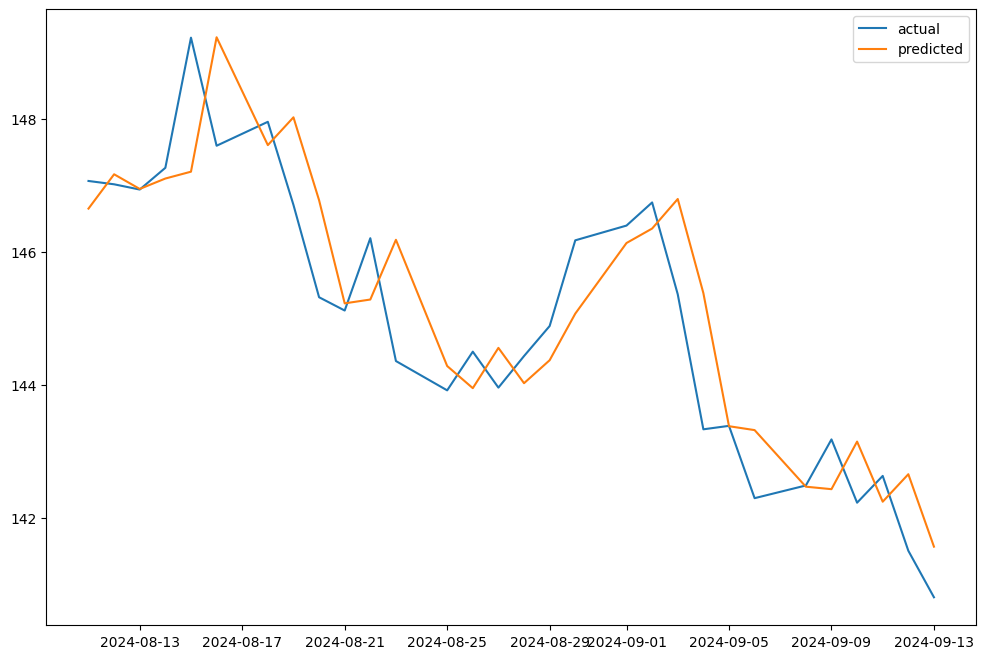

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.plot(predictions_df.index, predictions_df.original, label='actual')
plt.plot(predictions_df.index, predictions_df.predicted, label='predicted')
plt.legend()
plt.show()